In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd


In [ ]:
items_data = pd.read_csv("/content/ECON370-provisions-items.csv")
transactions_data = pd.read_csv("/content/ECON370-provisions-transactions.csv")

In [ ]:
items_data.head()

,Reference Handle,Token,Item Name,Variation Name,Unit and Precision,SKU,Description,Category,GTIN,Square Online Item Visibility,...,Pickup Enabled,Price,Archived,Skip Detail Screen in POS,Default Unit Cost,Current Quantity MacGillivray LLC,Stock Alert Enabled MacGillivray LLC,Stock Alert Count MacGillivray LLC,Modifier Set - Woven Basket,Tax - Sales Tax (6.25%)
0,#11-madison-vermouth-regular,OO2NYD3XU3CPLJDJTHGBZHPS,11 Madison Vermouth,Regular,NaN,11MV,NaN,Alcohol-Free,NaN,visible,...,NaN,35.00,N,NaN,25.00,0.0,NaN,NaN,N,N
1,#1808-beira-altitude-vineyards-red-blend--regular,QTDMJ7YJK6DNGIPML34XKS7T,1808 Beira Altitude Vineyards (Red Blend),Regular,NaN,NaN,Bin 126\n\nValue driven - 1808 Beira Altitude ...,Wine,5.600817e+12,visible,...,Y,12.00,N,N,5.34,0.0,N,0.0,N,N
2,#2013-valdicava-brunello-sangiovese-grosso--re...,OWOAZQALFUSFZ3M6R3ST5KNS,2013 Valdicava Brunello (Sangiovese Grosso),Regular,NaN,2013 Valdicava Brunello,NaN,Wine,NaN,visible,...,Y,140.00,N,N,99.00,1.0,Y,5.0,N,N
3,#2015-valdicava-brunello-sangiovese-grosso--re...,52D7BF6ZU4K7FBOP4FSBM5WA,2015 Valdicava Brunello (Sangiovese Grosso),Regular,NaN,2015 Valdicava Brunello $170,NaN,Wine,NaN,visible,...,Y,170.00,N,N,121.00,1.0,N,0.0,N,N
4,#24k-gold-plate-regular,JQMO2VYRMLYGJSFGCOIAABEF,24K Gold Plate,Regular,NaN,24KGP,NaN,Merchandise (non-food),NaN,unavailable,...,N,60.00,Y,N,30.00,0.0,NaN,NaN,N,Y


In [ ]:
items_list = items_data["Item Name"].unique().tolist()
print(items_list)
print(len(items_list))

['11 Madison Vermouth', '1808 Beira Altitude Vineyards (Red Blend)', '2013 Valdicava Brunello (Sangiovese Grosso)', '2015 Valdicava Brunello (Sangiovese Grosso)', '24K Gold Plate', '3 pack cookies', '33 Books Beer', '33 Bottles of Wine (Hardcover)', '33 Pieces of Cheese', '33 Tins of Fish (Paperback)', '4 Oz All Natural Irish Cured Salmon (Homarus)', '4 Oz All Natural Norwegian Salmon (Homarus)', '4 Oz All Natural Smoked Salmon (Homarus)', '5 PC. chocolate truffles', '6 Furlongs (Cabernet Sauvignon)', '9 Di Dante Inferno Rosso Vermouth', '9di Dante Rosé Vermouth', 'ARRABBIATA - sugo di pomodoro e peperoncino 250g', 'Abbaye St. Remy Trappistes Rochefort 10', 'Abstinence Cape Citrus', 'Abstinence Cape Spice', 'Abstinence Spirits Cape Floral | Award Winning Non-Alcoholic Spirit | Calorie-Free', "Abstinence's Epilogue X", 'Acetaia Leonardi Sigillo Argento Balsamic Vinegar IGP (Silver Seal)', 'Acor Portuguese Sardines In Olive Oil', 'Acor Tuna In Olive Oil', 'Acôr Tuna Belly in Olive Oil', 

In [ ]:
transactions_data = transactions_data[transactions_data['amt.total'] != 0]

In [ ]:
transactions_data.head()

,date,time,gross.sales,discount,net.sales,gift.card,tax,amt.total,amt.card,amt.cash,amt.gift.card,amt.other,fees,amt.net,card.type,items,customer.id,first.name,discount.type
0,2023-12-31,17:22:11,36.0,0.0,36.0,0,0.0,36.0,36.0,0.0,0.0,0,-1.00,35.00,MasterCard,Singlecut Beersmiths Dry-Hopped Dry Ale 4pk Ca...,38MJ6BKS8P9A0FBAGXBH8QRS0R,NaN,NaN
1,2023-12-31,17:17:50,39.0,0.0,39.0,0,0.0,39.0,39.0,0.0,0.0,0,-1.08,37.92,MasterCard,Maestri Salame Rustico (Regular) Sweetbrook Fa...,A9YGVF3G2H5478AE3A9CZPXM2G,Brandie,NaN
2,2023-12-31,17:13:49,231.0,0.0,231.0,0,0.0,231.0,231.0,0.0,0.0,0,-5.88,225.12,MasterCard,Brewer's Crackers - Everything Flatbread Crack...,S2XATVHGMN4H71KT3D30ZSB4MC,Peter,NaN
3,2023-12-31,17:03:46,40.0,0.0,40.0,0,0.0,40.0,40.0,0.0,0.0,0,-1.10,38.90,Visa,Nero di Cio Lambrusco (Regular) Flora Rosato (...,ZF58GPHRWACSBSTJS4N3CYP8XG,NaN,NaN
4,2023-12-31,16:57:11,34.0,0.0,34.0,0,0.0,34.0,34.0,0.0,0.0,0,-0.95,33.05,MasterCard,9 Di Dante Inferno Vermouth (Regular) - Bin 231,R0XCHCVGVXVJ0S1T6J9PANZF8M,NaN,NaN


In [ ]:
import pandas as pd

# Step 1: Make a copy of the relevant data (optional but good practice)
date_df = transactions_data.copy()

# Step 2: Convert the 'date' column to datetime
date_df['date'] = pd.to_datetime(date_df['date'])  # Convert 'date' to datetime

# Step 3: Set the 'date' column as the index if you need it for resampling
date_df.set_index('date', inplace=True)

# Step 4: Now aggregate by week (sum up the 'sales' column by week)
weekly_data = date_df.resample('W').sum()

# If you don't want to use the 'date' column as the index but still group by week
# Step 5: Create a 'week' column
date_df['week'] = date_df.index.to_period('W')  # This extracts the week from the datetime index

# Step 6: Group by 'week' and aggregate the 'sales' column by week
weekly_grouped = date_df.groupby('week').sum()  # Group by the 'week' column

weekly_grouped.head()

#print("meep", weekly_grouped.shape[0])


,time,gross.sales,discount,net.sales,gift.card,tax,amt.total,amt.card,amt.cash,amt.gift.card,amt.other,fees,amt.net,card.type,items,customer.id,first.name,discount.type
week,,,,,,,,,,,,,,,,,,
2023-01-02/2023-01-08,19:17:3619:13:2419:12:3218:47:2918:18:3918:14:...,3851.0,-25.8,3825.2,0,0.00,3825.20,3533.20,262.0,30.0,0,-96.42,3728.78,VisaMasterCardAmerican ExpressVisaDiscoverMast...,Marino Abate Sicilian Red (Regular) Milenrama ...,JG9P4A3Z1111X00WJE33EG7C9MS2XATVHGMN4H71KT3D30...,SlaterPeterLaurenLauraCarolineAlexisErinJoanBr...,F&FF&F
2023-01-09/2023-01-15,19:11:1719:00:0118:43:5418:15:2318:13:2118:12:...,4223.0,0.0,4223.0,75,0.00,4298.00,3797.00,397.0,104.0,0,-105.27,4192.73,VisaVisaVisaMasterCardVisaMasterCardVisaMaster...,beyra (Regular) Jasper Hill Farm Cabot Clothbo...,A8J0M4FPZH7EDAWXGVD6SWT9YMPQQWPNSSE14VFEFR5Y6J...,SarahElizabethThomasJonathanJavierJavierJeffAl...,0
2023-01-16/2023-01-22,18:45:3418:32:4718:01:4417:55:5517:32:2217:03:...,4222.0,0.0,4222.0,0,0.00,4222.00,3742.00,349.0,131.0,0,-102.70,4119.30,MasterCardVisaDiscoverMasterCardMasterCardGift...,Barbera D'Alba 2019 (Regular) Tenorino Tuna Fi...,7W9B8597QH5TS33KMDVVPQQ38GEJRMR5NCZH4Q79A9803B...,ThomasWendyRobertKayeMarcTristanHenryElizabeth...,0
2023-01-23/2023-01-29,18:02:1218:23:0917:43:0717:27:0817:16:5717:16:...,5216.0,-34.6,5181.4,100,0.00,5281.40,4854.40,417.0,10.0,0,-132.82,5148.58,MasterCardVisaVisaMasterCardVisaMasterCardVisa...,2021 Frenchtown Farms Pearl Thief (Regular)ale...,S2XATVHGMN4H71KT3D30ZSB4MCH3B4FQ6CGN055B76ZBE6...,PeterAlyoshaJennaAriannaTimothyAMaureenAlexisC...,F&FF&F
2023-01-30/2023-02-05,18:12:2418:10:3217:58:3617:57:4617:31:5317:14:...,4539.0,-23.0,4516.0,0,27.68,4543.68,4220.68,313.0,10.0,0,-114.33,4429.35,VisaDiscoverVisaMasterCardVisaVisaMasterCardVi...,Fresh Basil Pesto - 6 oz. (default) - Savor th...,ED0PBD8YYX4V3AHYG1VG1CFDZ83FZ9HYADR15FB2FE8541...,JaquelinShivonRyanTimothyAlyseJamesChrystinaWi...,F&F


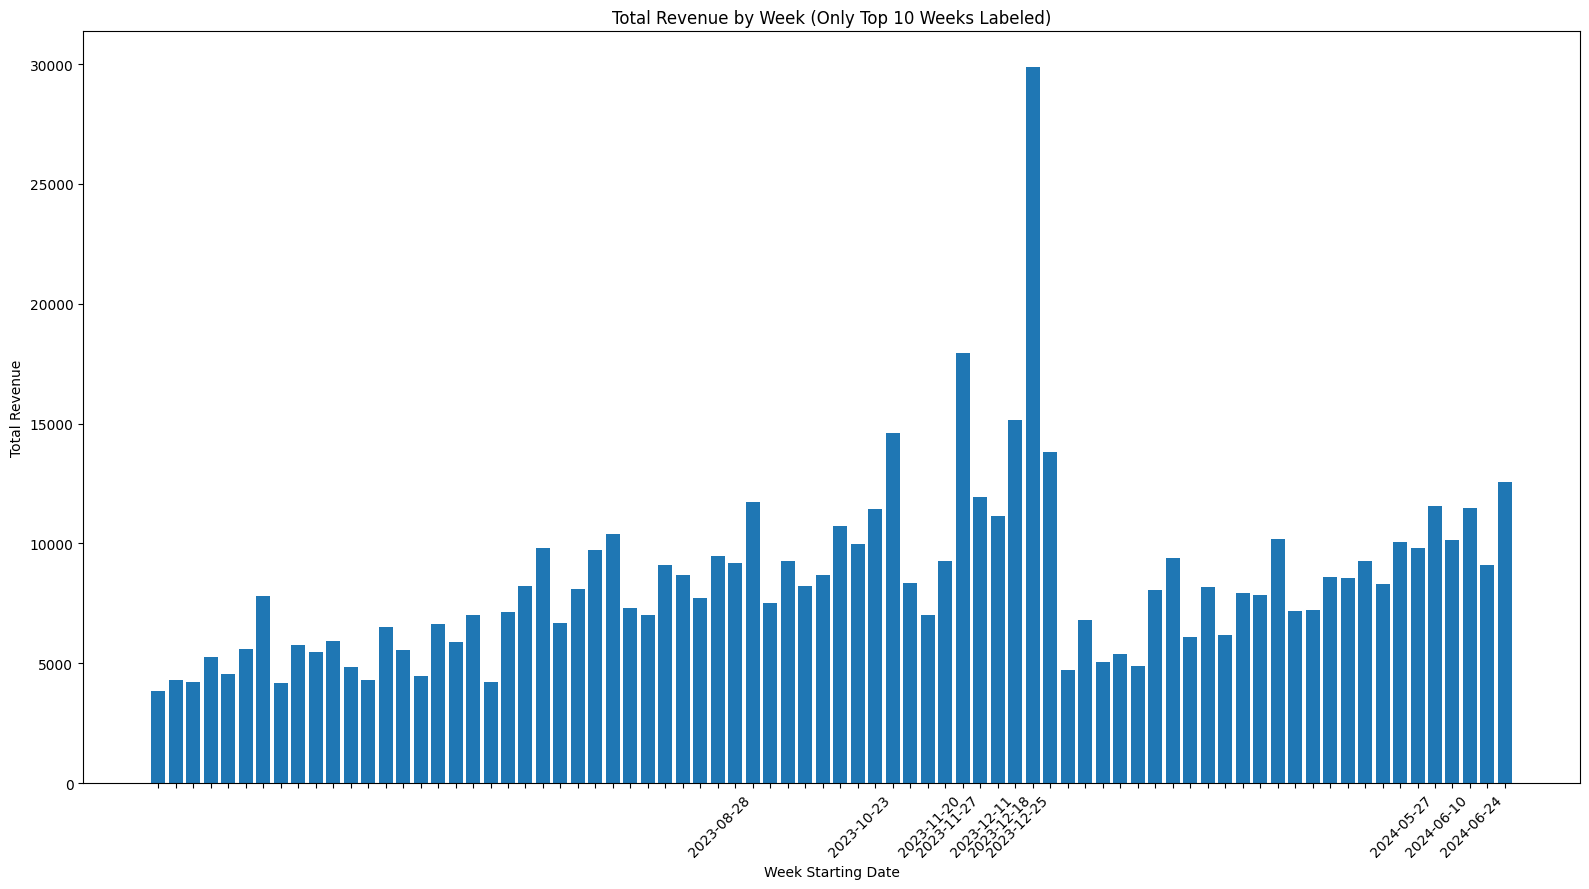

In [78]:
import matplotlib.pyplot as plt

# Step 1: Sort the data by 'amt.total' and select the top 10 weeks
top_10_weeks = weekly_grouped.nlargest(10, 'amt.total')

# Step 2: Extract only the first date from the weekly_grouped.index for all weeks
all_first_dates = [date_range.split('/')[0] for date_range in weekly_grouped.index.astype(str)]

# Step 3: Create the bar plot for all weeks
plt.figure(figsize=(16, 9))  # Increase figure size for better spacing
plt.bar(all_first_dates, weekly_grouped['amt.total'])

# Step 4: Extract the top 10 week labels
top_10_dates = [date_range.split('/')[0] for date_range in top_10_weeks.index.astype(str)]

# Step 5: Manually set x-ticks for all weeks, but only label the top 10
plt.xticks(ticks=range(len(all_first_dates)), labels=[
    label if label in top_10_dates else '' for label in all_first_dates
], rotation=45, ha='right')

# Step 6: Customize the plot
plt.xlabel('Week Starting Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Week (Only Top 10 Weeks Labeled)')

plt.savefig("/content/top_weeks.png", format='png')

# Step 7: Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Sort the data by 'amt.total' in descending order and select the top 5 weeks
top_five_weeks = weekly_grouped.sort_values(by='amt.total', ascending=False).head(5)

top_five_weeks.head()

,time,gross.sales,discount,net.sales,gift.card,tax,amt.total,amt.card,amt.cash,amt.gift.card,amt.other,fees,amt.net,card.type,items,customer.id,first.name,discount.type
week,,,,,,,,,,,,,,,,,,
2023-12-18/2023-12-24,16:49:4916:33:2416:22:1316:18:4016:17:1515:58:...,28339.50,-221.26,28118.24,1645,107.58,29870.82,27881.08,1411.62,578.12,0,-744.55,29126.27,MasterCardVisaAmerican ExpressVisaMasterCardAm...,Rustichella d'Abruzzo Duru Wheat Linguine Past...,S2XATVHGMN4H71KT3D30ZSB4MCXV8EMDVG6C8BDQVMM1FN...,PeterElizabethRobertPatriciaLindaGregoryGregor...,F&FCaseF&FCaseCaseCaseCaseCaseCase F&FCase
2023-11-20/2023-11-26,16:57:1616:34:2616:30:1316:28:0516:22:1016:11:...,17632.25,-19.80,17612.45,300,45.94,17958.39,17080.27,843.12,35.00,0,-459.32,17499.07,MasterCardVisaMasterCardVisaVisaMasterCardVisa...,Vietti Roero (Arneis) (Regular) - Bin 62\nViet...,S2XATVHGMN4H71KT3D30ZSB4MCCCEVEPB61DDVB8VCNTBX...,PeterSusanAndrewColleenHariMichaelMonikaMichae...,F&FF&FF&FF&FF&F
2023-12-11/2023-12-17,17:00:1116:56:2116:47:0716:46:2216:40:4116:38:...,13853.00,-154.52,13698.48,1410,43.02,15151.50,14108.58,865.92,177.00,0,-379.17,14772.33,VisaMasterCardVisaVisaAmerican ExpressVisaGift...,Stoneman Brewery Jolly J IPA (Regular) - Bin 2...,S2XATVHGMN4H71KT3D30ZSB4MCEN3CAASPS3SMPX2KVYWM...,PeterHenryKayeClairePeterJosephCynthiaJulieCad...,F&FF&FCase F&FF&FF&FF&FF&FF&FCase
2023-10-23/2023-10-29,17:24:4217:14:0217:13:2116:55:5616:54:3216:50:...,14433.00,-67.60,14365.40,0,245.55,14610.95,13753.95,711.00,146.00,0,-367.71,14243.24,VisaAmerican ExpressVisaAmerican ExpressVisaMa...,Sugarloaf Sunrise - Imperial Citra Pale Ale (R...,934G0VQT10ZKT43ZJWXJ9B2NZ4NKEBF7YAVYNQ0TFH0HPA...,BrendaJessicaStacyAJenniferJefferyMonikaMonika...,F&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&F
2023-12-25/2023-12-31,17:22:1117:17:5017:13:4917:03:4616:57:1116:54:...,13733.75,-55.40,13678.35,115,35.48,13828.83,12832.02,854.50,142.31,0,-346.74,13482.09,MasterCardMasterCardMasterCardVisaMasterCardMa...,Singlecut Beersmiths Dry-Hopped Dry Ale 4pk Ca...,38MJ6BKS8P9A0FBAGXBH8QRS0RA9YGVF3G2H5478AE3A9C...,BrandiePeterPeterWilliamAndrewJosephNoahLauraA...,F&FCaseF&FF&F


In [ ]:
#clean the top_five_weeks data
top_five_weeks_clean = top_five_weeks.drop(columns=['time'])
top_five_weeks_clean = top_five_weeks.drop(columns=['card.type'])
top_five_weeks_clean = top_five_weeks.drop(columns=['first.name'])
top_five_weeks_clean.head()

,time,gross.sales,discount,net.sales,gift.card,tax,amt.total,amt.card,amt.cash,amt.gift.card,amt.other,fees,amt.net,card.type,items,customer.id,discount.type
week,,,,,,,,,,,,,,,,,
2023-12-18/2023-12-24,16:49:4916:33:2416:22:1316:18:4016:17:1515:58:...,28339.50,-221.26,28118.24,1645,107.58,29870.82,27881.08,1411.62,578.12,0,-744.55,29126.27,MasterCardVisaAmerican ExpressVisaMasterCardAm...,Rustichella d'Abruzzo Duru Wheat Linguine Past...,S2XATVHGMN4H71KT3D30ZSB4MCXV8EMDVG6C8BDQVMM1FN...,F&FCaseF&FCaseCaseCaseCaseCaseCase F&FCase
2023-11-20/2023-11-26,16:57:1616:34:2616:30:1316:28:0516:22:1016:11:...,17632.25,-19.80,17612.45,300,45.94,17958.39,17080.27,843.12,35.00,0,-459.32,17499.07,MasterCardVisaMasterCardVisaVisaMasterCardVisa...,Vietti Roero (Arneis) (Regular) - Bin 62\nViet...,S2XATVHGMN4H71KT3D30ZSB4MCCCEVEPB61DDVB8VCNTBX...,F&FF&FF&FF&FF&F
2023-12-11/2023-12-17,17:00:1116:56:2116:47:0716:46:2216:40:4116:38:...,13853.00,-154.52,13698.48,1410,43.02,15151.50,14108.58,865.92,177.00,0,-379.17,14772.33,VisaMasterCardVisaVisaAmerican ExpressVisaGift...,Stoneman Brewery Jolly J IPA (Regular) - Bin 2...,S2XATVHGMN4H71KT3D30ZSB4MCEN3CAASPS3SMPX2KVYWM...,F&FF&FCase F&FF&FF&FF&FF&FF&FCase
2023-10-23/2023-10-29,17:24:4217:14:0217:13:2116:55:5616:54:3216:50:...,14433.00,-67.60,14365.40,0,245.55,14610.95,13753.95,711.00,146.00,0,-367.71,14243.24,VisaAmerican ExpressVisaAmerican ExpressVisaMa...,Sugarloaf Sunrise - Imperial Citra Pale Ale (R...,934G0VQT10ZKT43ZJWXJ9B2NZ4NKEBF7YAVYNQ0TFH0HPA...,F&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&F
2023-12-25/2023-12-31,17:22:1117:17:5017:13:4917:03:4616:57:1116:54:...,13733.75,-55.40,13678.35,115,35.48,13828.83,12832.02,854.50,142.31,0,-346.74,13482.09,MasterCardMasterCardMasterCardVisaMasterCardMa...,Singlecut Beersmiths Dry-Hopped Dry Ale 4pk Ca...,38MJ6BKS8P9A0FBAGXBH8QRS0RA9YGVF3G2H5478AE3A9C...,F&FCaseF&FF&F


In [ ]:
# Filter the DataFrame to include only rows where 'amt.total' is greater than
weeks = weekly_grouped[weekly_grouped['amt.total'] > 11000]

num_weeks = weeks['amt.total'].count()

# Print the result
print(f"Number of weeks with 'amt.total' above 11000: {num_weeks}")


Number of weeks with 'amt.total' above 11000: 12


In [ ]:
top_five_weeks_clean.head()
top_five_weeks_clean.columns

Index(['time', 'gross.sales', 'discount', 'net.sales', 'gift.card', 'tax',
       'amt.total', 'amt.card', 'amt.cash', 'amt.gift.card', 'amt.other',
       'fees', 'amt.net', 'card.type', 'items', 'customer.id',
       'discount.type'],
      dtype='object')

In [ ]:
def split_items_into_list(row, items_list):
    # Initialize an empty list to accumulate items for the specific row
    item_accumulator = []

    # Iterate over each item in the items_list
    for item in items_list:
        # Check if the current item is in the row's 'items' string
        if pd.notnull(row['items']) and item in row['items']:
            # Add the item to the accumulator list for that row
            item_accumulator.append(item)

    # Return the list of items found in the row
    return item_accumulator

# Apply the function to each row of the DataFrame using the 'apply' method
# For each row, split the items string into a list of individual items
top_five_weeks_clean['itemslist'] = top_five_weeks_clean.apply(lambda row: split_items_into_list(row, items_list), axis=1)

# Now print the 'items_list' for any row, let's say row 2 for example
top_five_weeks_clean.head()

,time,gross.sales,discount,net.sales,gift.card,tax,amt.total,amt.card,amt.cash,amt.gift.card,amt.other,fees,amt.net,card.type,items,customer.id,discount.type,itemslist
week,,,,,,,,,,,,,,,,,,
2023-12-18/2023-12-24,16:49:4916:33:2416:22:1316:18:4016:17:1515:58:...,28339.50,-221.26,28118.24,1645,107.58,29870.82,27881.08,1411.62,578.12,0,-744.55,29126.27,MasterCardVisaAmerican ExpressVisaMasterCardAm...,Rustichella d'Abruzzo Duru Wheat Linguine Past...,S2XATVHGMN4H71KT3D30ZSB4MCXV8EMDVG6C8BDQVMM1FN...,F&FCaseF&FCaseCaseCaseCaseCaseCase F&FCase,"[1808 Beira Altitude Vineyards (Red Blend), 33..."
2023-11-20/2023-11-26,16:57:1616:34:2616:30:1316:28:0516:22:1016:11:...,17632.25,-19.80,17612.45,300,45.94,17958.39,17080.27,843.12,35.00,0,-459.32,17499.07,MasterCardVisaMasterCardVisaVisaMasterCardVisa...,Vietti Roero (Arneis) (Regular) - Bin 62\nViet...,S2XATVHGMN4H71KT3D30ZSB4MCCCEVEPB61DDVB8VCNTBX...,F&FF&FF&FF&FF&F,"[33 Bottles of Wine (Hardcover), 6 Furlongs (C..."
2023-12-11/2023-12-17,17:00:1116:56:2116:47:0716:46:2216:40:4116:38:...,13853.00,-154.52,13698.48,1410,43.02,15151.50,14108.58,865.92,177.00,0,-379.17,14772.33,VisaMasterCardVisaVisaAmerican ExpressVisaGift...,Stoneman Brewery Jolly J IPA (Regular) - Bin 2...,S2XATVHGMN4H71KT3D30ZSB4MCEN3CAASPS3SMPX2KVYWM...,F&FF&FCase F&FF&FF&FF&FF&FF&FCase,"[2013 Valdicava Brunello (Sangiovese Grosso), ..."
2023-10-23/2023-10-29,17:24:4217:14:0217:13:2116:55:5616:54:3216:50:...,14433.00,-67.60,14365.40,0,245.55,14610.95,13753.95,711.00,146.00,0,-367.71,14243.24,VisaAmerican ExpressVisaAmerican ExpressVisaMa...,Sugarloaf Sunrise - Imperial Citra Pale Ale (R...,934G0VQT10ZKT43ZJWXJ9B2NZ4NKEBF7YAVYNQ0TFH0HPA...,F&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&FF&F,"[1808 Beira Altitude Vineyards (Red Blend), 33..."
2023-12-25/2023-12-31,17:22:1117:17:5017:13:4917:03:4616:57:1116:54:...,13733.75,-55.40,13678.35,115,35.48,13828.83,12832.02,854.50,142.31,0,-346.74,13482.09,MasterCardMasterCardMasterCardVisaMasterCardMa...,Singlecut Beersmiths Dry-Hopped Dry Ale 4pk Ca...,38MJ6BKS8P9A0FBAGXBH8QRS0RA9YGVF3G2H5478AE3A9C...,F&FCaseF&FF&F,"[2013 Valdicava Brunello (Sangiovese Grosso), ..."


In [ ]:
#check what a sample looks like
#top_five_weeks_clean.iloc[0]['items']

In [ ]:
def split_items_into_list(row, items_list):
    # Initialize an empty list to accumulate items for the specific row
    item_accumulator = []

    # Iterate over each item in the items_list
    for item in items_list:
        if pd.notnull(row['items']):
            # First check if the item exists in the row's 'items' string
            if item in row['items']:
                # Split the row's 'items' string into parts by comma or hyphen
                parts = row['items'].split(',')

                for part in parts:
                    part = part.strip()  # Remove leading/trailing whitespace

                    # Check if the part contains the item
                    if item in part:
                        # Isolate the prefix to see if it contains a quantity
                        prefix = part.split(item)[0].strip()  # Get the part before the item

                        # Check for a pattern like "2 x" or "3 x"
                        if 'x' in prefix:
                            # Split the prefix to extract potential quantity
                            quantity_str = prefix.split('x')[0].strip()
                            if quantity_str.isdigit():  # Ensure it's a digit
                                quantity = int(quantity_str)  # Convert to integer
                                # Add the item (quantity - 1) times more to the accumulator
                                item_accumulator.extend([item] * (quantity - 1))
                            else:
                                item_accumulator.append(item)  # Append once if no valid quantity
                        else:
                            item_accumulator.append(item)  # Append once if no quantity

    # Return the list of items found in the row
    return item_accumulator

# Apply the function to each row of the DataFrame using the 'apply' method
top_five_weeks_clean['items_list'] = top_five_weeks_clean.apply(lambda row: split_items_into_list(row, items_list), axis=1)

# Now print the 'items_list' for a specific row (e.g., row 2)
print(top_five_weeks_clean.iloc[2]['items_list'])


['2013 Valdicava Brunello (Sangiovese Grosso)', '33 Books Beer', '33 Tins of Fish (Paperback)', '33 Tins of Fish (Paperback)', '33 Tins of Fish (Paperback)', '33 Tins of Fish (Paperback)', '33 Tins of Fish (Paperback)', '6 Furlongs (Cabernet Sauvignon)', 'Adirondack Dill Spread', 'Adirondack Horseradish Cheddar Bars (AHC)', 'Adirondack Smokehouse Bacon Cheddar Spread', 'Aeronaut Dream Atlas', 'Aeronaut Dream Atlas', 'Aeronaut Dream Atlas', 'Agricola Brandini (Barbera D`Alba) DISCONTINUED', 'Agricola Brandini (Barbera D`Alba) DISCONTINUED', 'Alaska Smokehouse Chipotle Salmon', 'Alaska Smokehouse Chipotle Salmon', 'Alaska Smokehouse Chipotle Salmon', 'Alaska Smokehouse Dill Salmon', 'Alaska Smokehouse Pepper Garlic Salmon Spread Serving Design', 'Alaska Smokehouse Smoked Salmon Spread', 'Alaska Smokehouse Smoked Salmon Spread', 'Alaska Smokehouse Spread S', 'Alaska Smokehouse Spread S', 'Alaska Smokehouse Spread S', 'Alaska Smokehouse Spread S', 'Alaska Smokehouse Spread S', 'Alaska Smok

In [ ]:
#counts counts for each item across entire data set
from collections import defaultdict

# Initialize a defaultdict to count occurrences of each item
item_count_dict = defaultdict(int)

# Iterate through each row in the DataFrame
for index, row in top_five_weeks_clean.iterrows():
    # Check if 'items_list' is a list and is not empty
    items = row['items_list']  # Change 'items_list' to 'itemslist' as per your previous context
    if isinstance(items, list) and items:
        for item in items:
            # Increment the count for each item
            item_count_dict[item] += 1

# Convert the defaultdict to a regular dict if desired
item_count_dict = dict(item_count_dict)

# Optionally, print the item counts for verification
#for item, count in item_count_dict.items():
    #print(f"{item}: {count}")

In [ ]:
# Sort the dictionary by value in descending order
sorted_item_count_dict = dict(sorted(item_count_dict.items(), key=lambda item: item[1], reverse=True))

# Optionally, print the sorted item counts for verification
#for item, count in sorted_item_count_dict.items():
 #   print(f"{item}: {count}")


In [84]:
#seperate by row
first_week = top_five_weeks_clean.iloc[0]
second_week = top_five_weeks_clean.iloc[1]
third_week = top_five_weeks_clean.iloc[2]
fourth_week = top_five_weeks_clean.iloc[3]
fifth_week = top_five_weeks_clean.iloc[4]

In [83]:
# Step 4: Extract the top 10 week labels
top_10_dates = [date_range.split('/')[0] for date_range in top_10_weeks.index.astype(str)]
first_date = top_10_dates[0]
second_date = top_10_dates[1]
third_date = top_10_dates[2]
fourth_date = top_10_dates[3]
fifth_date = top_10_dates[4]

In [ ]:
#CODE FOR GETTING THE TOP ITEMS FOR ONE INDIVDUAL WEEK
# Initialize a defaultdict to count occurrences of each item
item_count_week_one = defaultdict(int)

    # Check if 'items_list' is a list and is not empty
items = one_week['items_list']  # Change 'items_list' to 'itemslist' as per your previous context
if isinstance(items, list) and items:
  for item in items:
    # Increment the count for each item
    item_count_week_one[item] += 1

# Convert the defaultdict to a regular dict if desired
item_count_week_one = dict(item_count_week_one)

# Optionally, print the item counts for verification
#for item, count in item_count_week_one.items():
    #print(f"{item}: {count}")

sorted_item_count_week_one = dict(sorted(item_count_week_one.items(), key=lambda item: item[1], reverse=True))
print(sorted_item_count_week_one)

{'Baguette - Bread': 72, 'High Lawn Farm Queen': 29, 'Austin Paso Robles': 24, "Brewer's Crackers - Everything Flatbread Crackers": 21, 'Lobster Spread': 18, 'Amaro Falso': 16, "Foustman's Pepperoni": 14, 'Milenrama Reserva': 14, "Lapa Nero d' Avola": 13, 'Flora Prosecco (Glera)': 12, "Foustman's Smoked Pork Salami": 12, 'Oatmeal Cookies Sugarfina': 12, 'Alaska Smokehouse Spread S': 11, "Effie's Homemade Lightly Sweet Ginger Biscuits": 11, 'Four Fat Fowl - Camembertha': 11, 'Jasper Hill Farm Little Hosmer Bloomy Rind': 11, 'Sangria Mix': 11, "Brewer's Pretzel Flatbreads": 10, "Brewer's Sea Salt Flatbread Crackers": 10, 'Fishwife Fly By Jing Smoked Salmon with Sichuan Chili Crisp': 10, 'Hot and Spicy Japanese Barbecue Sauce': 10, 'Maine Beer Company - Lunch - India Pale Ale - 9 Oz Bottle': 10, 'OomA Tesoros Marinara Sauce': 10, 'Böcking Riesling': 9, 'Cantina di Carpi Notte Bianca (Pignoletto)': 9, "Emily's Granola": 9, 'Fishwife Smoked Albacore Tuna': 9, 'Hampstead Tea Lavender & Valer

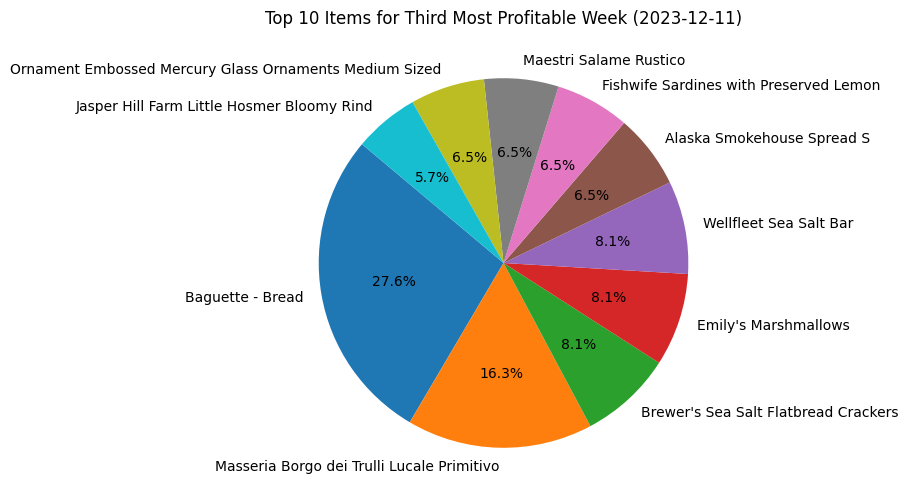

In [89]:
#INDIVIDUAL PIE CHART
items = third_week['items_list']

# Step 2: Count occurrences of items for the current row
item_count_dict_row = defaultdict(int)
if isinstance(items, list) and items:
  for item in items:
      item_count_dict_row[item] += 1

    # Step 3: Sort the item count dictionary by value and select the top 10 items
sorted_item_count_dict_row = dict(sorted(item_count_dict_row.items(), key=lambda item: item[1], reverse=True)[:10])

    # Step 4: Prepare the data for the pie chart
labels = list(sorted_item_count_dict_row.keys())
sizes = list(sorted_item_count_dict_row.values())

    # Step 5: Create a pie chart for the current row
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Top 10 Items for Third Most Profitable Week ({third_date})")

    # Step 6: Save the pie chart as a PNG file
plt.savefig("/content/pie_chart_week_third.png", format='png')

    # Step 7: Display the pie chart (optional)
plt.show()

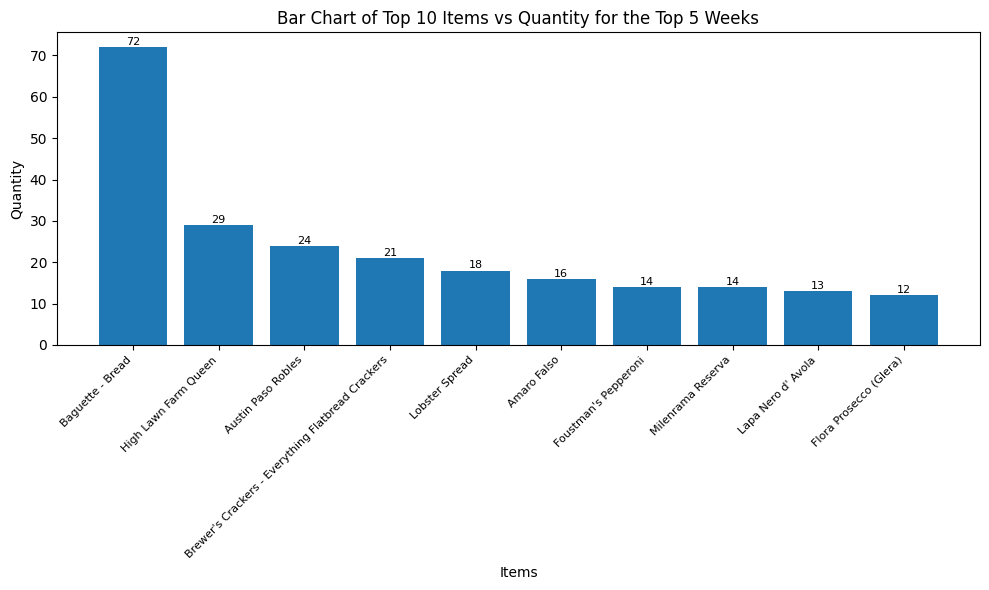

In [68]:
import matplotlib.pyplot as plt

# Step 1: Extract keys and values from sorted_item_count_week_one
# Limit to the top 10 items
top_10_items = list(sorted_item_count_week_one.keys())[:10]  # Get the top 10 keys
top_10_quantities = list(sorted_item_count_week_one.values())[:10]  # Get the top 10 values

# Step 2: Create the x-axis as an index for the top 10 items
x = range(len(top_10_items))

# Step 3: Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, top_10_quantities)

# Step 4: Add labels to each bar in the chart
for i, label in enumerate(top_10_quantities):
    plt.text(i, label + 0.5, str(label), ha='center', fontsize=8)  # Adjust text position slightly above the bar

# Step 5: Customize the plot
plt.xlabel('Items')
plt.ylabel('Quantity')
plt.title('Bar Chart of Top 10 Items vs Quantity for the Top 5 Weeks')

plt.savefig("/content/bar_chart.png", format='png')

# Step 6: Customize the x-axis to show item names instead of numbers
plt.xticks(ticks=x, labels=top_10_items, rotation=45, ha='right', fontsize=8)

# Step 7: Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


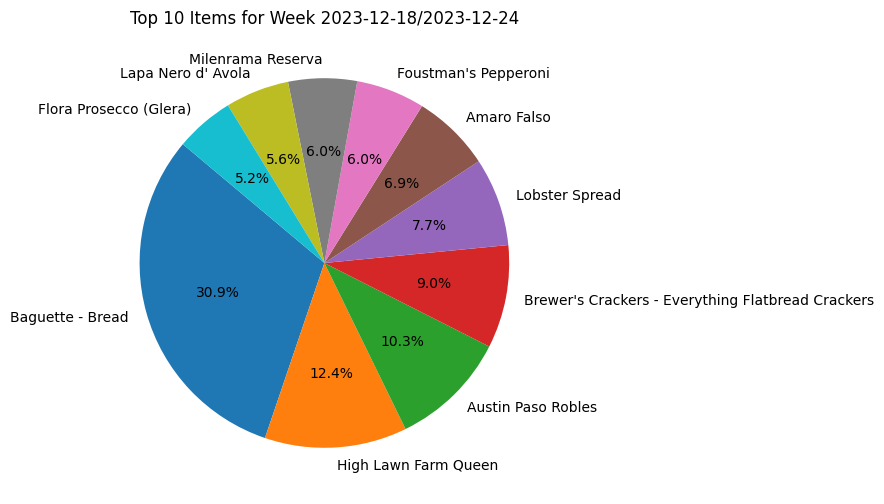

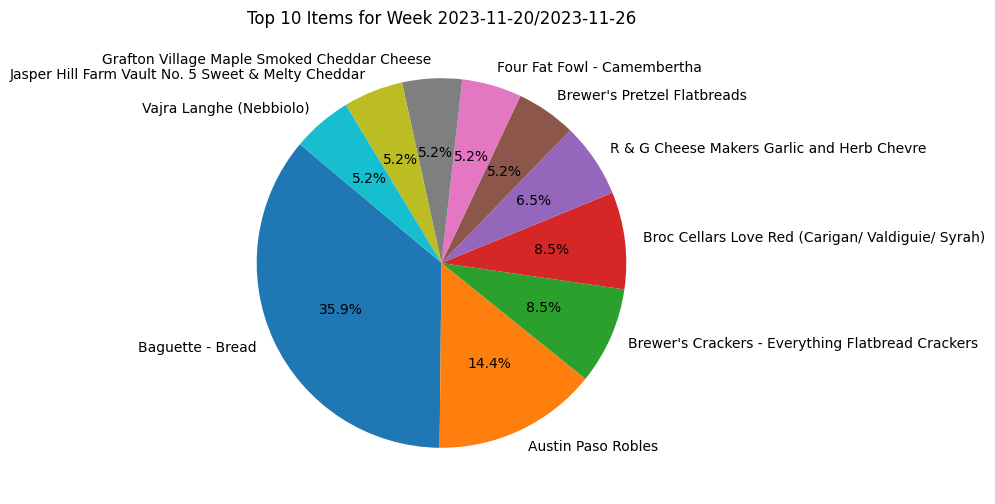

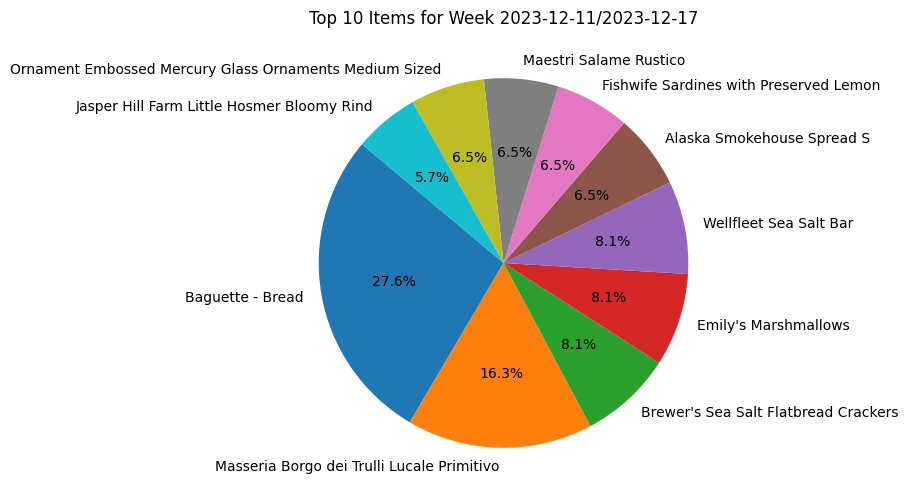

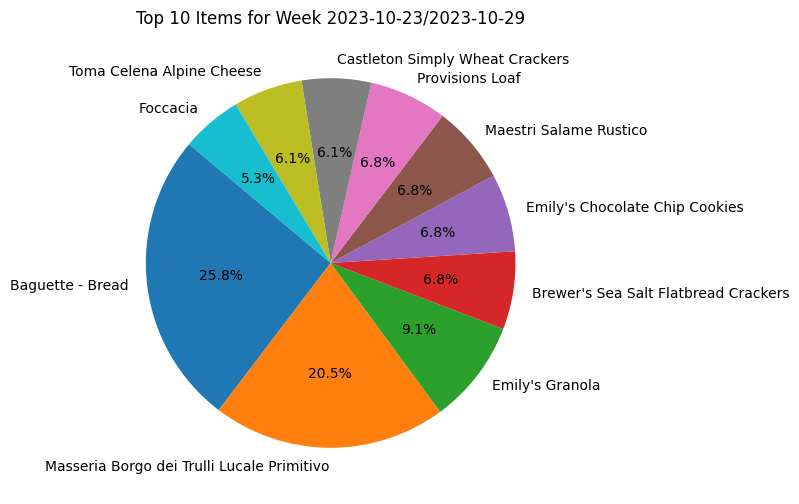

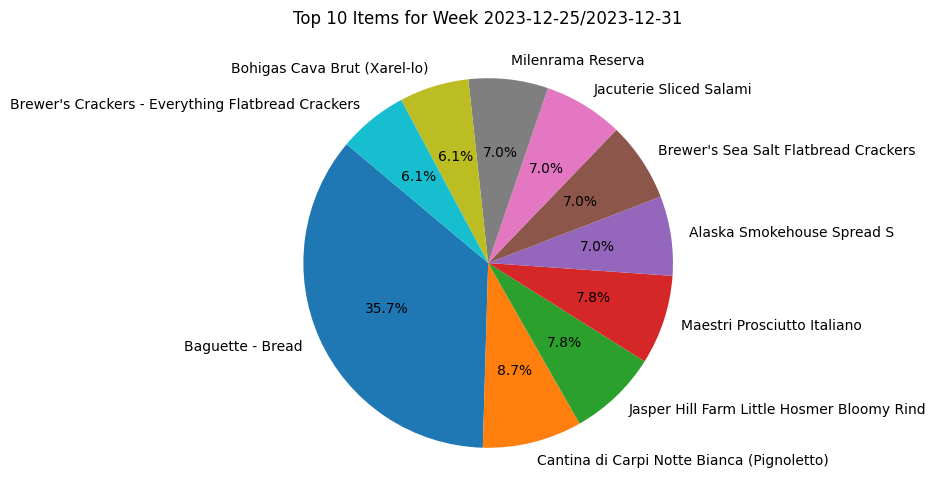

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Loop through each row in 'top_five_weeks_clean'
for index, row in top_five_weeks_clean.iterrows():
    items = row['items_list']

    # Step 2: Count occurrences of items for the current row
    item_count_dict_row = defaultdict(int)
    if isinstance(items, list) and items:
        for item in items:
            item_count_dict_row[item] += 1

    # Step 3: Sort the item count dictionary by value and select the top 10 items
    sorted_item_count_dict_row = dict(sorted(item_count_dict_row.items(), key=lambda item: item[1], reverse=True)[:10])

    # Step 4: Prepare the data for the pie chart
    labels = list(sorted_item_count_dict_row.keys())
    sizes = list(sorted_item_count_dict_row.values())

    # Step 5: Create a pie chart for the current row
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 10 Items for Week {index}")

    # Step 7: Display the pie chart (optional)
    plt.show()

    # Close the figure to avoid overlapping figures in the next iteration
    plt.close()